# <a href="https://miptstats.github.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.

**Правила, <font color="red">прочитайте внимательно</font>:**


* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины. Правила переноса дедлайнов определены в презентации с первого занятия.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Задачи 1 и 2 сдаются в систему Яндекс.Контест. Ссылка на контест в телеграм-боте.


**Сдача задачи 3:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Прислать нужно **ноутбук в формате `ipynb`**.
* Телеграм не разрешает боту получать файлы более **20 Мб**. Если ваше решение весит больше, *заранее* разделите ноутбук на несколько.
* Для выполнения задания **используйте этот ноутбук в качестве основы, ничего не удаляя из него**. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 10 баллов
* Задача 2 &mdash; 10 баллов
* Задача 3 &mdash; 80 баллов


Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

In [ ]:
import numpy as np
import pandas as pd

# import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.3, palette="Set2")

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 2.

Условие задачи и сдача в системе Яндекс.Контест. Ссылка на контест в телеграм-боте.

---
### Задача 3.

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.

На дополнительном занятии 10 февраля будет показан простой пример работы с датасетом Титаник. Сейчас ваша задача &mdash; на основе простого анализа предоставленных данных обучить несколько классификаторов для определения выживших, иначе говоря, получить некоторые приближенные правила определения, выжил пассажир или нет, а также сравнить эти правила по качеству приближения.

#### 1. Подготовка данных

Загрузите данные с помощью `pandas`.

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


data = pd.read_csv("train.csv", index_col=0)

In [ ]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.3)

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак. Примените к обеим частям таблицы функцию ниже

In [ ]:
features_columns = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак


def get_features_and_target(data):
    features = data[features_columns]
    target = data[target_column]
    return features, target

In [ ]:
train_features, train_target = get_features_and_target(train)
test_features, test_target = get_features_and_target(test)

Обоснование по отсутствию обработки признаков: заметим, что некорректные значения (NaN) в используемых колонках не встречаются, поэтому обработка признаков не требуется.

#### 2. Исследование

**Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков.*

# Исследуем количество выживших

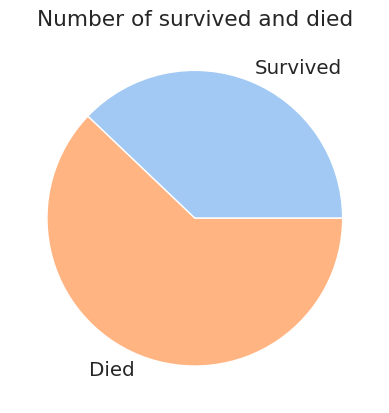

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# define data
data_train = [
    train["Survived"].loc[train["Survived"] == 1].size,
    train["Survived"].loc[train["Survived"] == 0].size,
]
labels = ["Survived", "Died"]

# define Seaborn color palette to use
colors = sns.color_palette("pastel")[0:5]

# create pie chart
plt.pie(data_train, labels=labels, colors=colors)

plt.title("Number of survived and died")

plt.show()

Видим, что большинство пассажиров погибло.

# Исследуем зависимость выживаемости от возраста.

Заметим, что выжили в среднем женщины из 1 и 2 класса, а также совсем пожилые люди.

Также можем заметить, что выжило много детей в возрасте до 5 лет. Вероятно, их сажали в шлюпки в первую очередь.

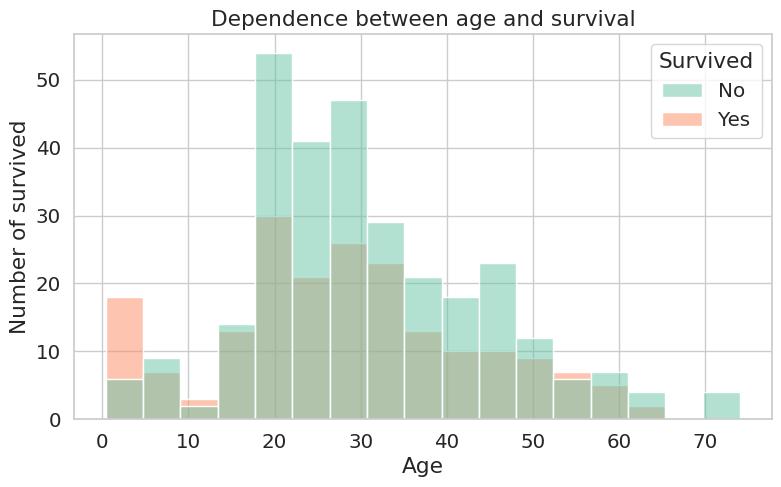

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(data=train, x="Age", hue="Survived")

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Dependence between age and survival")
    plt.xlabel("Age")
    plt.ylabel("Number of survived")
    # data=train.loc[train['Sex'] == 'female']

# Продолжим предыдущее исследование, разбив пассажиров по полам

Обнаружим, что большинство женщин выжило, причём в целом вне зависимости от возраста. Вероятно, женщин старались спасать в первую очередь.

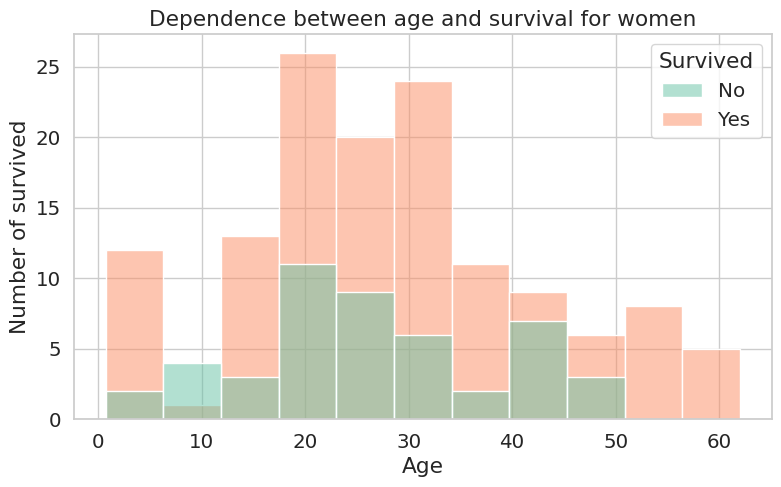

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "female"], x="Age", hue="Survived"
    )

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Dependence between age and survival for women")
    plt.xlabel("Age")
    plt.ylabel("Number of survived")

# В целом, озвученная выше гипотеза про зависимость выживаемости от возраста подтверждается и на мужчинах

Однако большинство мужчин, кроме детей и глубоких стариков погибло -- вероятно, они уступали плавсредства женщинам и детям.

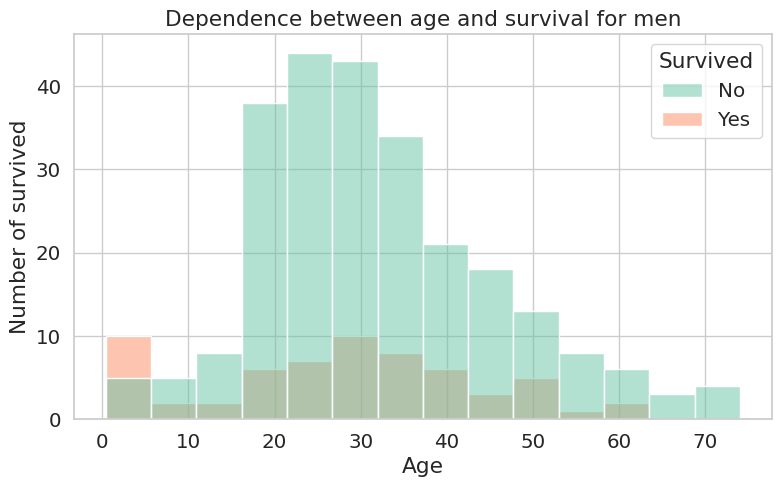

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "male"], x="Age", hue="Survived"
    )

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Dependence between age and survival for men")
    plt.xlabel("Age")
    plt.ylabel("Number of survived")

# Давайте изучим соотношение числа мужчин и женщин на Титанике

Женщин заметно (примерно в 2 раза) меньше, чем мужчин. Гипотеза о том, что женщинам уступали места в шлюпках, а на мужчин мест почти не хватило, подтверждается.

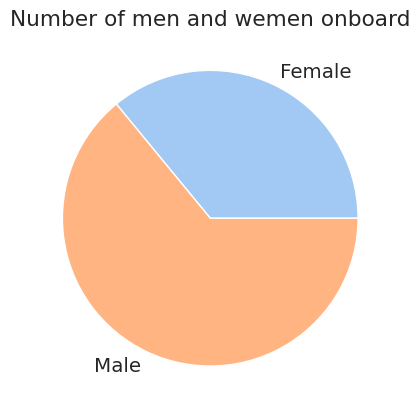

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# define data
data_train = [
    train["Sex"].loc[train["Sex"] == "female"].size,
    train["Sex"].loc[train["Sex"] == "male"].size,
]
labels = ["Female", "Male"]

# define Seaborn color palette to use
colors = sns.color_palette("pastel")[0:5]

# create pie chart
plt.pie(data_train, labels=labels, colors=colors)

plt.title("Number of men and wemen onboard")

plt.show()

# Давайте изучим соотношение количеств пассажиров различных классов


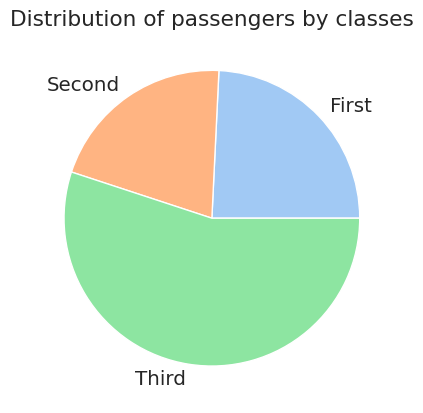

In [ ]:
# define data
data_train = [
    train["Pclass"].loc[train["Pclass"] == 1].size,
    train["Pclass"].loc[train["Pclass"] == 2].size,
    train["Pclass"].loc[train["Pclass"] == 3].size,
]
labels = ["First", "Second", "Third"]

# define Seaborn color palette to use
colors = sns.color_palette("pastel")[0:5]

# create pie chart
plt.pie(data_train, labels=labels, colors=colors)

plt.title("Distribution of passengers by classes")

plt.show()

# Давайте исследуем выживаемость женщин и мужичин в зависимости от класса.

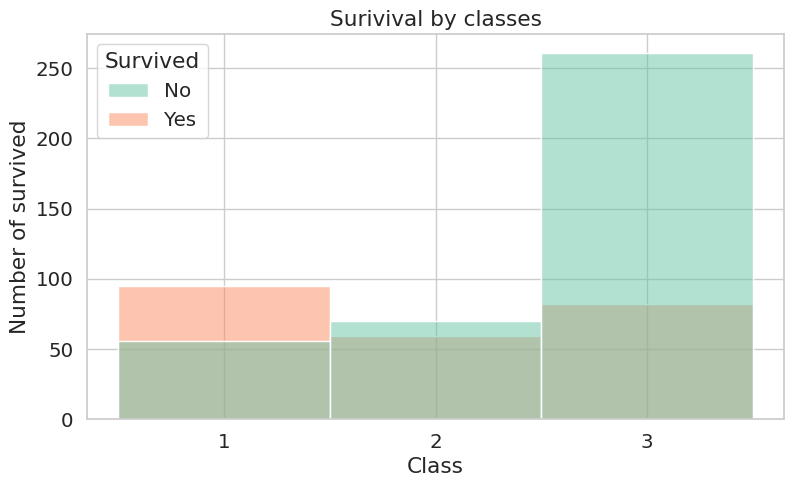

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(data=train, x="Pclass", hue="Survived", discrete=True)
    hist.set(xticks=[1, 2, 3])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.xlabel("Class")
    plt.ylabel("Number of survived")

    plt.title("Surivival by classes")

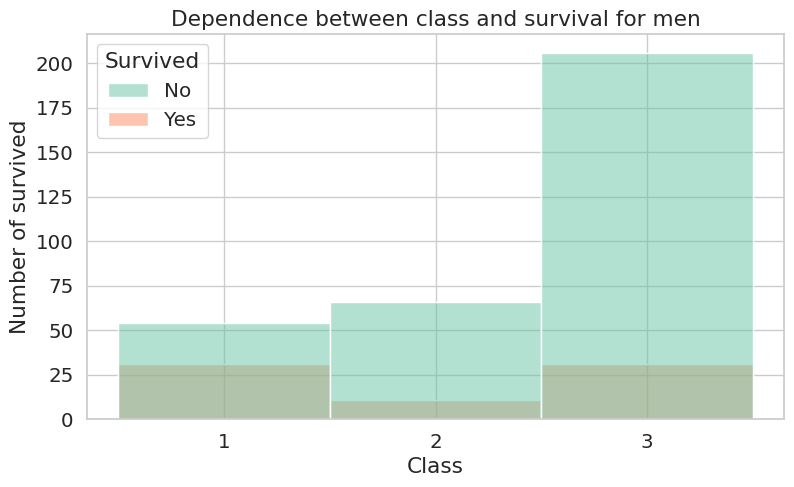

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "male"],
        x="Pclass",
        hue="Survived",
        discrete=True,
    )
    hist.set(xticks=[1, 2, 3])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Dependence between class and survival for men")
    plt.xlabel("Class")
    plt.ylabel("Number of survived")

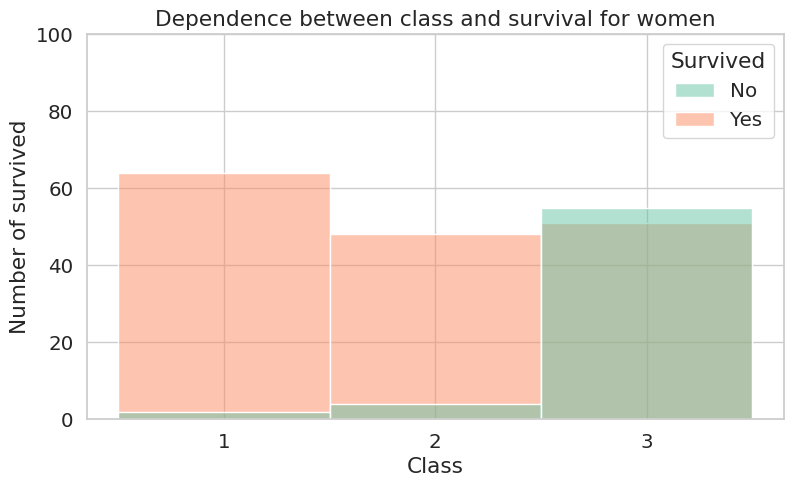

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "female"],
        x="Pclass",
        hue="Survived",
        discrete=True,
    )
    hist.set(ylim=(0, 100), xticks=[1, 2, 3])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Dependence between class and survival for women")
    plt.xlabel("Class")
    plt.ylabel("Number of survived")

С высокой вероятностью, каюты первого и второго классов, как наиболее дорогие, располагались выше, а поэтому находившиеся в них пассажиры смогли быстрее добраться до шлюпок. Видимо, мест было настолько мало, что даже женщинам из 3 класса их уже не хватило.

# Теперь давайте рассмотрим выживаемость в зависимости от порта посадки

Данное значение с высокой вероятностью не будет влиять на выживаемость, однако давайте проверим это предположение. Графики аналогично рассмотренным выше будем строить сначала для обоих полов, затем для мужчин и женщин по-отдельности.

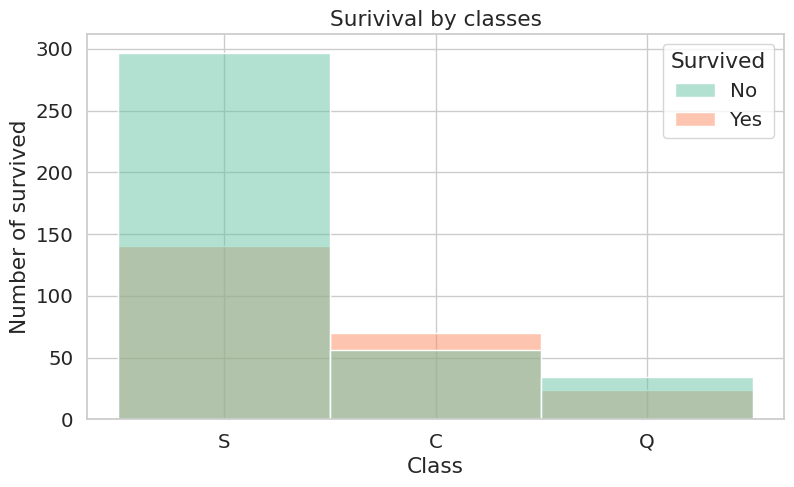

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(data=train, x="Embarked", hue="Survived", discrete=True)
    hist.set(xticks=["C", "Q", "S"])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.xlabel("Port of embarkment")
    plt.ylabel("Number of survived")

    plt.title("Surivival by embarkment")

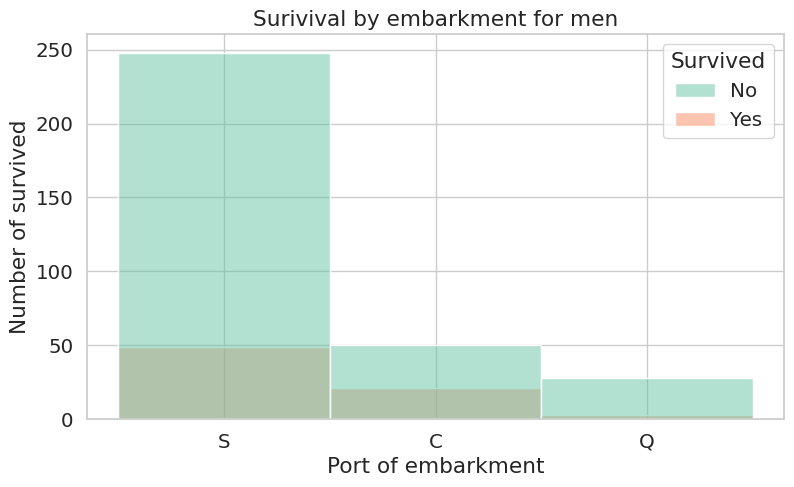

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "male"],
        x="Embarked",
        hue="Survived",
        discrete=True,
    )
    hist.set(xticks=["C", "Q", "S"])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Surivival by embarkment for men")
    plt.xlabel("Port of embarkment")
    plt.ylabel("Number of survived")

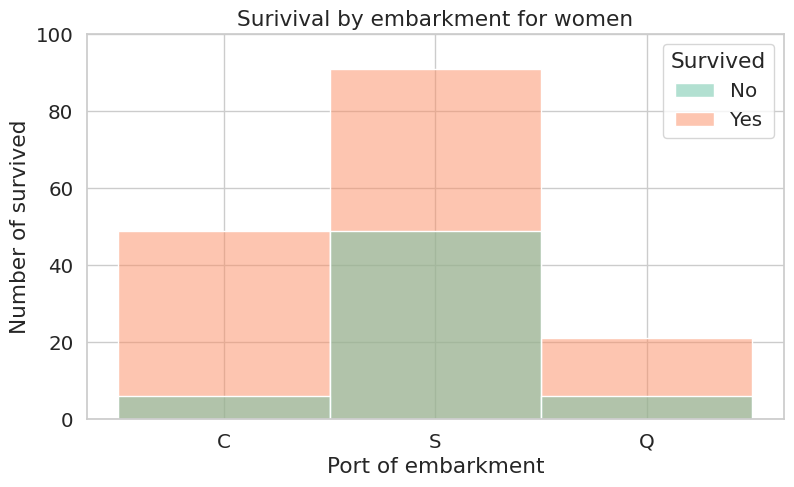

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.histplot(
        data=train.loc[train["Sex"] == "female"],
        x="Embarked",
        hue="Survived",
        discrete=True,
    )
    hist.set(ylim=(0, 100), xticks=["C", "Q", "S"])

    leg = hist.get_legend()
    leg.set_title("Survived")
    leg.texts[0].set_text("No")
    leg.texts[1].set_text("Yes")

    plt.title("Surivival by embarkment for women")
    plt.xlabel("Port of embarkment")
    plt.ylabel("Number of survived")

Как и предполагалось, никакой зависимости между портом посадки и выживаемостью не наблюдается.

#### 3. Классификация методом ближайшего соседа

Ранее в контесте вы уже реализовали функцию поиска ближайших соседей. Теперь давайте применим ее для решения нашей текущей задачи.

Реализуйте функцию, которая для каждого объекта тестового набора данных найдет $k$ ближайших соседей из обучающего набора данных, и в качестве ответа возьмет наиболее часто встречающееся значение целевого признака среди найденных соседей. Обратите внимание, что соседей необходимо искать только среди объектов обучающего набора данных.

In [ ]:
import numpy as np
import typing as tp


def matrix_multiplication(A: np.ndarray, B: np.ndarray) -> np.ndarray:
    A_with_three_dimensions = A[:, None, :]
    BT_with_three_dimensions = B.transpose()[None, :, :]
    return (A_with_three_dimensions * BT_with_three_dimensions).sum(axis=2)


def find_nearest_points(A: np.ndarray, B: np.ndarray, k: int) -> np.ndarray:
    A_2 = (np.sum((A**2), axis=1))[:, None]
    B_2 = (np.sum((B**2), axis=1))[:, None].transpose()
    return np.argsort(B_2 + A_2 - 2 * matrix_multiplication(A, B.transpose()))[
        :, :k
    ]

In [ ]:
import numpy as np


def most_frequent(arr):
    unique, counts = np.unique(arr, return_counts=True)
    max_count_index = np.argmax(counts)
    return unique[max_count_index]


def knn(features, train_features, train_target, k=1):
    A_square = np.sum(features**2, axis=1, keepdims=True)
    B_square = np.sum(train_features**2, axis=1, keepdims=True)
    AB = np.matmul(features, train_features.T)
    distances = np.sqrt(abs(A_square - 2 * AB + B_square.T))
    nearest_indices = np.argsort(distances, axis=1)[:, :k]

    # nearest_indices = find_nearest_points(features,train_features, k)

    result = []

    [result.append(most_frequent(train_target[i])) for i in nearest_indices]

    predicted = pd.Series(result)
    return predicted

Постройте классификатор методом ближайшего соседа, используя только признаки `Age` и `Fare`.

Какую метрику (функцию расстояния) вы при этом используете? Нужно ли предварительно что-то сделать с признаками?

Да, стоит отнормировать цену билета и возраст пассажиров. Давайте сделаем это перед тем, как использовать данные в knn и деревьях.

In [ ]:
test_features["Age_norm"] = (
    test_features["Age"] - test_features["Age"].mean()
) / test_features["Age"].std()
test_features["Fare_norm"] = (
    test_features["Fare"] - test_features["Fare"].mean()
) / test_features["Fare"].std()

train_features["Age_norm"] = (
    train_features["Age"] - train_features["Age"].mean()
) / train_features["Age"].std()
train_features["Fare_norm"] = (
    train_features["Fare"] - train_features["Fare"].mean()
) / train_features["Fare"].std()

<ipython-input-19-815119917c2c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Age_norm'] = (test_features['Age'] - test_features['Age'].mean())/test_features['Age'].std()
<ipython-input-19-815119917c2c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_features['Fare_norm'] = (test_features['Fare'] - test_features['Fare'].mean())/test_features['Fare'].std()
<ipython-input-19-815119917c2c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [ ]:
knn(
    test_features[["Age_norm", "Fare_norm"]].to_numpy(),
    train_features[["Age_norm", "Fare_norm"]].to_numpy(),
    train_target.to_numpy(),
)

0      0
1      1
2      0
3      0
4      1
      ..
263    0
264    0
265    0
266    0
267    1
Length: 268, dtype: int64

In [ ]:
sum(
    knn(
        test_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_target.to_numpy(),
    )
)

87

Как меняется результат классификации при другом количестве соседей?

* Если мы рассматриваем больше 1 соседа, то количество предсказанных выживших при небольшом (3) количестве соседей вырастет.

* Однако при дальнейшем увеличении числа соседей, в связи с тем, что в среднем пассажир погибал, количество предсказанных выживших уменьшится.

Рассмотрите хотя бы три различных нечетных значения количества соседей.



In [ ]:
sum(
    knn(
        test_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_target.to_numpy(),
        3,
    )
)

76

In [ ]:
sum(
    knn(
        test_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_target.to_numpy(),
        5,
    )
)

77

In [ ]:
sum(
    knn(
        test_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_target.to_numpy(),
        7,
    )
)

73

Как можно было бы учесть другие признаки? Какие при этом могут возникнуть проблемы?

Скорее всего, имя почти никак не влияет на выживаемость, по крайней мере в среднем, также как и номер билета. Таким образом, нам нужно учесть порт посадки, номер каюты, а также пол, которые в исходном виде записаны в виде строк, а потому использовать их в knn в исходном виде невозможно.

Пол и порт посадки очевидным образом можно биективно занумеровать. С каютой все несколько сложнее, и мне кажется, что учитывая количество NaN в данном типе данных, её разумнее не учитывать.

Очевидные проблемы могут возникнуть с нормализацией категориальных признаков (выживаемости, класса, пола и т.д.), для их использования разумно написать сложную весовую функцию, а не стандартное расстояние.


Строить классификатор с другими признаками при этом не нужно.

#### 4. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики.

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. *Примечание*: дерево из одного листа имеет глубину 0.

Воспользуемся данными, полученными при построении графиков.

**Дерево 1:**

* Из графиков было замечено, что дети до 5 лет, а также девушки в возрасте от 15 до 40 и старше 45 лет выживали заметно чаще.

* Среди мужчин же сколь-нибудь значительное соотношение выживших к общему количеству наблюдается лишь среди детей до 5 лет.

**Дерево 2:**

* Заметим, что женщины из 1 и 2 класса выжили почти поголовно, тогда как из 3 погибло подавляющее большинство.

* Для мужчин же столь заметного распределения нет, подавляющее большинство мужчин из всех трёх классов погибло

Реализуйте полученные деревья по шаблону

In [ ]:
def tree1(age, sex):
    if sex == "female":
        if (age <= 5) or (age >= 15 and age <= 40) or age > 45:
            return 1
        else:
            return 0
    else:
        if age <= 5:
            return 1
        else:
            return 0

In [ ]:
def tree2(sex, pclass):
    if sex == "female":
        if pclass == 1 or pclass == 2:
            return 1
        else:
            return 0
    else:
        return 0

#### 5. Качество

Вспомним, что у нас имеется тестовая часть выборки. Самое время ее использовать для того, чтобы оценить, насколько хорошими получились деревья. Предложите какой-нибудь критерий качества.

*Замечание*. Не стоит пытаться искать, какие критерии существуют. В данном случае легко предложить адекватный критерий. Стандартные критерии мы разберем позже, но для начала лучше подумать самостоятельно.

**Критерий:**

Посчитаем количество ошибочных предсказаний, поделим его на размер тестовой выборки и вычтем из единицы.

Обоснование выбора метрики:

* Метрика показывает отношение количества правильных ответов к общему количеству ответов (accuracy).

* Если ошибочных предсказаний нет, то метрика стремится к 1, в противном случае -- к 0.

Реализуйте данный критерий по шаблону

In [ ]:
def criteria(target, predicted):
    return np.round(1 - sum((target - predicted) ** 2) / len(target), 3)

Оцените качество построенных ранее моделей (два дерева, kNN), используя предложенный критерий.

*Примечание.* Полученные значения не влияют на оценку по задание. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
criteria(
    test_target, test_features.apply(lambda x: tree1(x.Age, x.Sex), axis=1)
)

0.769

In [ ]:
criteria(
    test_target, test_features.apply(lambda x: tree2(x.Sex, x.Pclass), axis=1)
)

0.776

In [ ]:
criteria(
    test_target.to_numpy(),
    knn(
        test_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_features[["Age_norm", "Fare_norm"]].to_numpy(),
        train_target.to_numpy(),
        3,
    ).to_numpy(),
)

0.634

Посчитайте значение предложенного ранее критерия качества для метода ближайшего соседа для значений $k$ от 1 до 10. Постройте график зависимости критерия качества от $k$. Как вы можете пояснить полученные результаты?

* При достижении достаточно большого количества соседей мы получаем некоторое среднее значение, которое в целом отвечает всей выборке. Поэтому значение метрики растёт, а затем с некоторого значения соседей выходит на "платформу" и значительно не меняется.

In [ ]:
x_data = np.arange(start=1, stop=11)
y_data = []

for i in x_data:
    y_data.append(
        criteria(
            test_target.to_numpy(),
            knn(
                test_features[["Age_norm", "Fare_norm"]].to_numpy(),
                train_features[["Age_norm", "Fare_norm"]].to_numpy(),
                train_target.to_numpy(),
                i,
            ).to_numpy(),
        )
    )

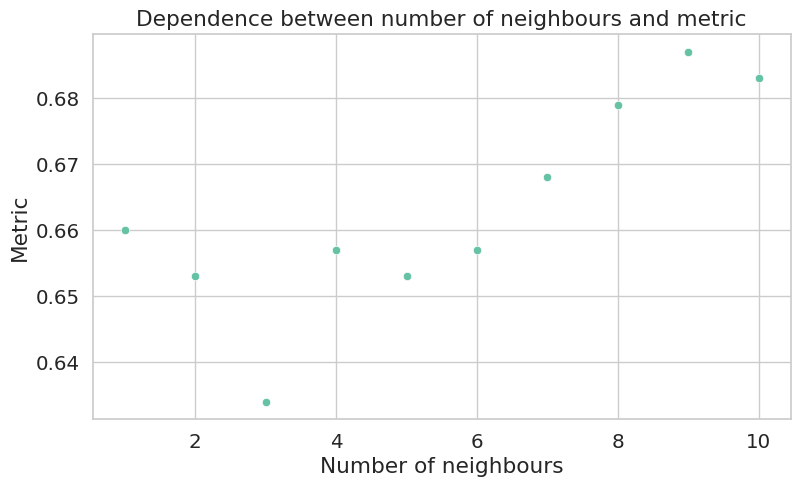

In [ ]:
with sns.axes_style("whitegrid"):
    plt.figure(figsize=(9, 5))
    hist = sns.scatterplot(x=x_data, y=y_data)
    plt.title("Dependence between number of neighbours and metric")
    plt.xlabel("Number of neighbours")
    plt.ylabel("Metric")

#### 6. Выводы

* Деревья сами по себе являются относительно неплохим подходом для классификации, однако они требуют либо обучения (как, например, xgboost), либо построения на основе графиков. Таким образом, графики, полученные в части 2, в данной работе не существуют в некотором вакууме, а служат для эффективного построения деревьев.

* Можно заметить, что даже такие простые подходы как knn без сложной весовой функции и деревья, построенные на основе графиков, дают достаточно неплохую точность.